In [9]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [10]:
batch_size = 32
epochs = 10

In [11]:
mnist_train = datasets.MNIST(
    "./datasets", train=True, transform=transforms.ToTensor(), download=True
)
mnist_test = datasets.MNIST(
    "./datasets", train=False, transform=transforms.ToTensor(), download=True
)

In [12]:
data_loader = DataLoader(
    dataset=mnist_train, batch_size=batch_size, shuffle=True, drop_last=True
)

In [13]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            nn.Linear(784, 200), nn.Sigmoid(), nn.Linear(200, 10)
        )
        self.loss_function = nn.CrossEntropyLoss()
        self.optimizer = torch.optim.SGD(self.parameters(), lr=0.01)

        self.progress = []

    def forward(self, inputs):
        return self.model(inputs)

    def train(self, inputs, targets):
        outputs = self.forward(inputs)
        loss = self.loss_function(outputs, targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()

        self.progress.append(loss.item())

    def plot_progress(self):
        plt.figure(figsize=(16, 8))
        plt.plot(self.progress, alpha=0.1, marker=".")
        plt.grid()
        plt.show()

In [14]:
# train
mnist_classifier = Classifier()

for epoch in range(epochs):
    for datas, targets in data_loader:
        datas = datas.view(-1, 28 * 28)

        mnist_classifier.train(datas, targets)
    print(f"\rEpoch: {epoch+1}/10", end="", flush=True)

Epoch: 10/10

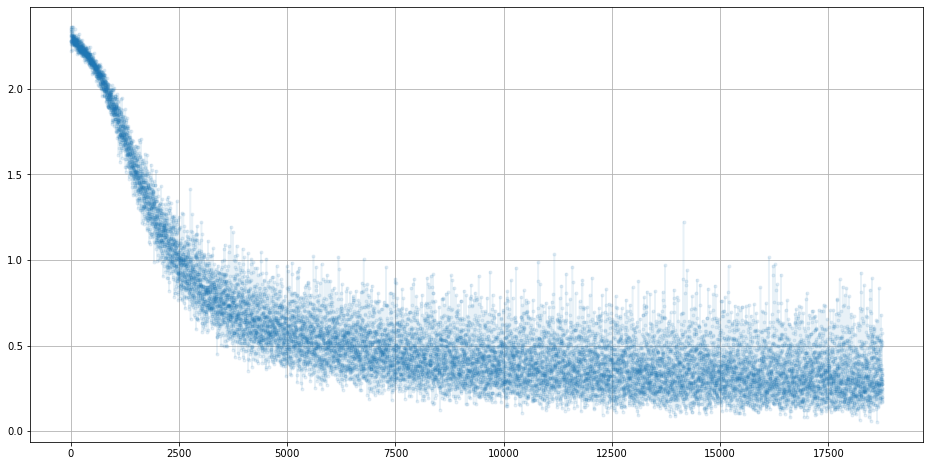

In [15]:
mnist_classifier.plot_progress()

In [16]:
# test
with torch.no_grad():
    test_datas = mnist_test.data.view(-1, 28 * 28).float()
    test_targets = mnist_test.targets

    prediction = mnist_classifier.forward(test_datas)
    accuracy = (torch.argmax(prediction, 1) == test_targets).float().mean().item()
    print(f"Accuracy: {accuracy:.9f}")

Accuracy: 0.887000024
